# Assumptions of One-Way ANOVA

1. Assumption of independence
2. Assumption of homogeneity of variance (Bartlett’s test)
3. Assumption of normality (Shapiro-Wilk test, QQ-plot)
4. Size groups are equal (for two-way Anova)

Contingency matrix: Ma trận tương quan

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})

In [3]:
def results(p, alpha=0.05):
    cols=['f_score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [4]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")

In [5]:
df.head()

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [6]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
df_melt.columns = ['id', 'phanbon', 'chieucao']
df_melt.sample(20)

,id,phanbon,chieucao
15,0,D,54
1,1,A,30
3,3,A,36
18,3,D,62
5,0,B,45
6,1,B,55
12,2,C,33
8,3,B,56
4,4,A,29
19,4,D,73


## Nghiên cứu tác dụng của các loại phân bón đến chiều cao của cây

Ở đây chúng ta có 4 loại phân bón, nên chúng ta so sánh chiều cao trung bình của các cây được sử dụng các loại phân bón A, B, C, D.

1 biến phân loại (4 levels) vs liên tục -> Anova one-way.

__$H_0$__: Không có sự khác biệt về chiều cao trung bình giữa 4 loại phân bón.

__$H_1$__: Có ít nhất hai loại phân bón có chiều cao trung bình khác biệt.

## Step 1: Chạy mô hình kiểm định Anova

In [7]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [8]:
# Đây là một cách khác để kiểm định Anova (one-way) -> Cách này là tốt nhất cho Anova!!!
# Ordinary Least Squares (OLS) model
model = ols('chieucao ~ C(phanbon)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [9]:
anova_table

,sum_sq,df,F,PR(>F)
C(phanbon),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


## Step 2: Kiểm tra các điều kiện cho kiểm định Anova

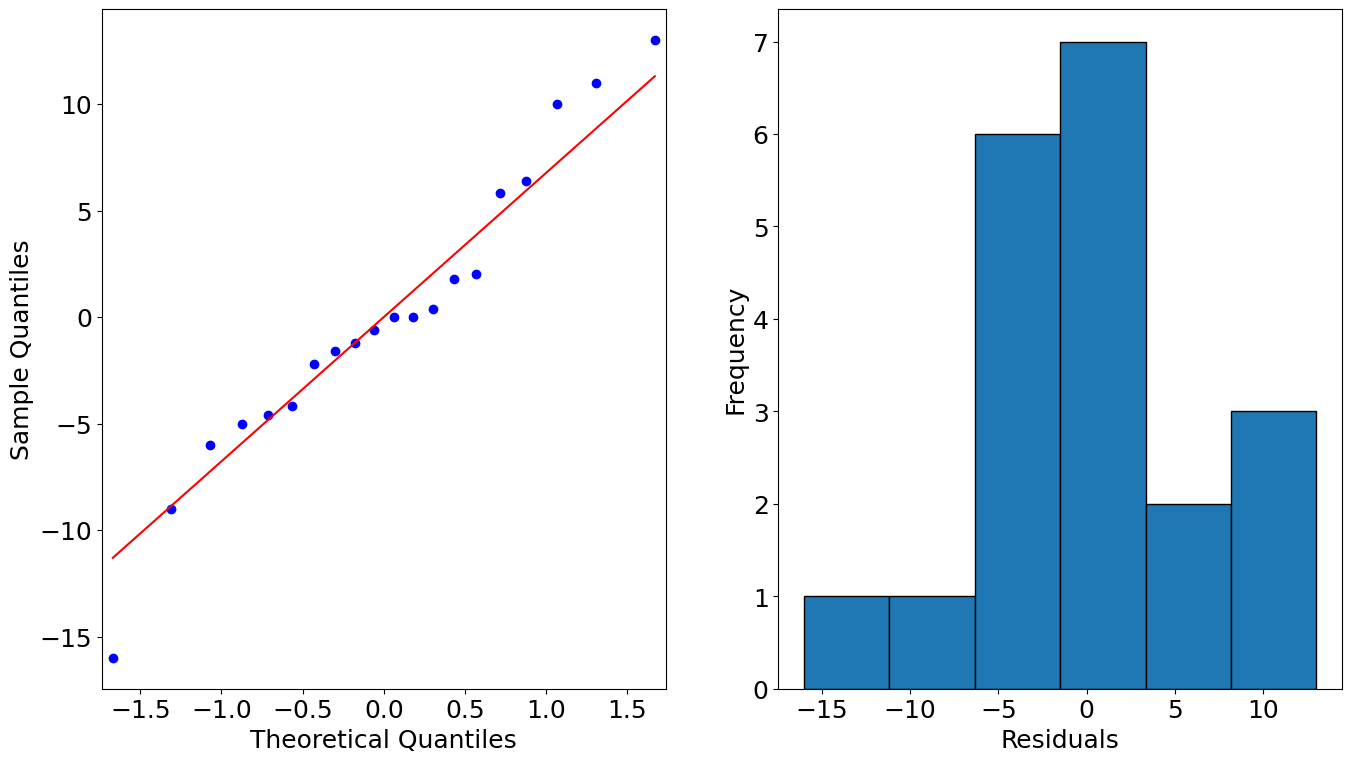

In [10]:
fig, ax = plt.subplots(1, 2)
# model.resid -> các giá trị thặng dư của model: dùng nó để kiểm tra điều kiện cho Anova

sm.qqplot(model.resid, line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()
#stats.shapiro(model.resid)

In [11]:
# Sử dụng kiểm định shapiro cho chuẩn/không chuẩn
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9685019850730896, pvalue=0.7229772806167603)

## Step 3: Kiểm định hậu nghiệm cho Anova (one-way)

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [13]:
tukey = pairwise_tukeyhsd(endog=df_melt['chieucao'],
                          groups=df_melt['phanbon'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,15.4,0.0251,1.6929,29.1071,True
A,C,1.6,0.9,-12.1071,15.3071,False
A,D,30.4,0.001,16.6929,44.1071,True
B,C,-13.8,0.0482,-27.5071,-0.0929,True
B,D,15.0,0.0296,1.2929,28.7071,True
C,D,28.8,0.001,15.0929,42.5071,True


### Mô tả trực quan hóa cho phần hậu nghiệm

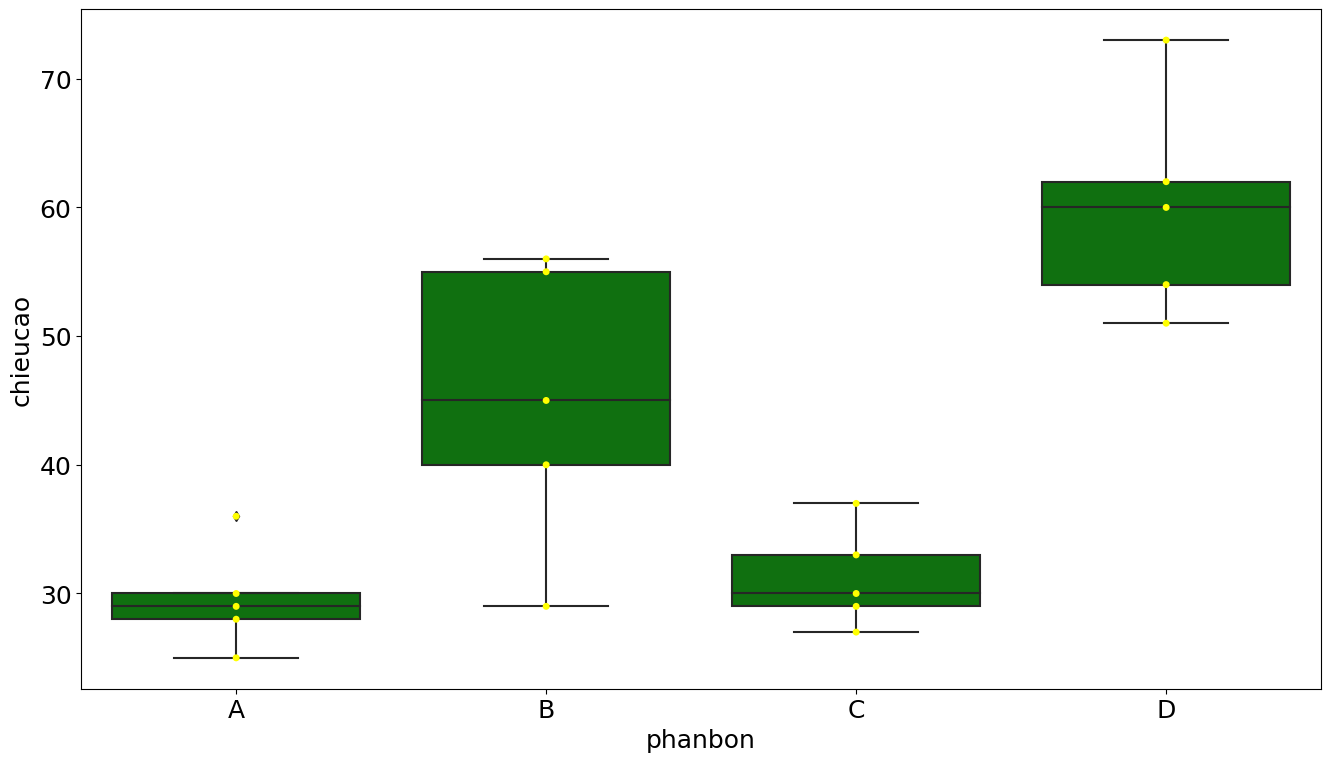

In [14]:
# Kỹ thuật EDA:
sns.boxplot(x='phanbon', y='chieucao', data=df_melt, color='green')
sns.swarmplot(x="phanbon", y="chieucao", data=df_melt, color='yellow')
plt.show()

### Dữ liệu cho phần bài tập

In [15]:
cl_df = pd.io.stata.read_stata("https://www.stata-press.com/data/r17/cholesterol.dta")

In [20]:
cl_df.head(20)

,race,agegrp,chol,agemidpt,meangrp
0,White,10–19,188.962997,15.0,179.853088
1,Black,10–19,179.729446,15.0,179.853088
2,Other,10–19,169.779404,15.0,179.853088
3,Black,10–19,176.760956,15.0,179.853088
4,Other,10–19,182.571182,15.0,179.853088
5,Black,10–19,181.808868,15.0,179.853088
6,Black,10–19,187.074249,15.0,179.853088
7,White,10–19,178.875641,15.0,179.853088
8,Other,10–19,180.069916,15.0,179.853088
9,White,10–19,192.537003,15.0,179.853088


### Bài tập về nhà (phần 2)

So sánh trung bình cholesterol của các nhóm sắc tộc khác nhau (race vs chol) -> Anova one-way.

In [59]:
chol = cl_df['chol']
racegrp = cl_df.groupby('race').groups
black = chol[racegrp['Black']]
white = chol[racegrp['White']]
other = chol[racegrp['Other']]

In [60]:
# Kiểm tra phân phối chuẩn
# black
from scipy.stats import shapiro
stat_black, p_black = shapiro(black)
print('stat=%.3f, p=%.3f' % (stat_black, p_black))
if p_black > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')
    

stat=0.968, p=0.584
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


In [61]:
# Kiểm tra phân phối chuẩn
# white 

stat_white, p_white = shapiro(white)
print('stat=%.3f, p=%.3f' % (stat_white, p_white))
if p_white > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')
    

stat=0.967, p=0.581
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


In [62]:
# Kiểm tra phân phối chuẩn
# orther

stat_other, p_other = shapiro(other)
print('stat=%.3f, p=%.3f' % (stat_other, p_other))
if p_other > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')
    

stat=0.952, p=0.280
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


Phát biểu giả thiết:

- $H_0$: Trung bình hàm lượng cholesteron giữa các nhóm là bằng nhau
- $H_1$: Trung bình hàm lượng cholesteron giữa các nhóm không bằng nhau

In [64]:
# Tiến hành phân tích ANOVA 1 chiều

from scipy.stats import f_oneway
std2 , p2 = f_oneway(black, white, other)
print('P_value = ',p2)
alpha = 0.05
if (p2 < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hàm lượng choles giữa các nhóm có sự khác biệt')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hàm lượng choles giữa các nhóm không có sự khác biệt.')

P_value =  0.33573021801437203
Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hàm lượng choles giữa các nhóm không có sự khác biệt.
